# Sex chromosomes in water frogs

Here we will search for sex linked markers and map them to the <i>Rana temporaria</i> genome assembly to find the sex chromosome.

The data here is in the form of VCFs contining SNP calls from ddRADseq data of three populations:

**North Ecsulentus**: 15F, 13M

**South Esculentus**: 18F, 16M

**North Lessonae**: 14F, 28M


In [15]:
%matplotlib inline  
%load_ext rpy2.ipython 
from __future__ import division
import MISC_RAD_tools as MISC
from matplotlib import pyplot as plt
import numpy as np
import ggplot

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [38]:
working_dir = "/home/djeffrie/Data/RADseq/Water_frogs"
catalog_path = "/home/djeffrie/Data/RADseq/Water_frogs/Subsampled/batch_1.catalog.tags.tsv.gz"

## Northern Esculentus

In [18]:
N_escu_vcf_path = "%s/north_esculentus/north_esculentus.vcf" % working_dir
N_escu_popmap_path = "%s/north_esculentus/popmap_north_esculentus.txt" % working_dir

### Checking data

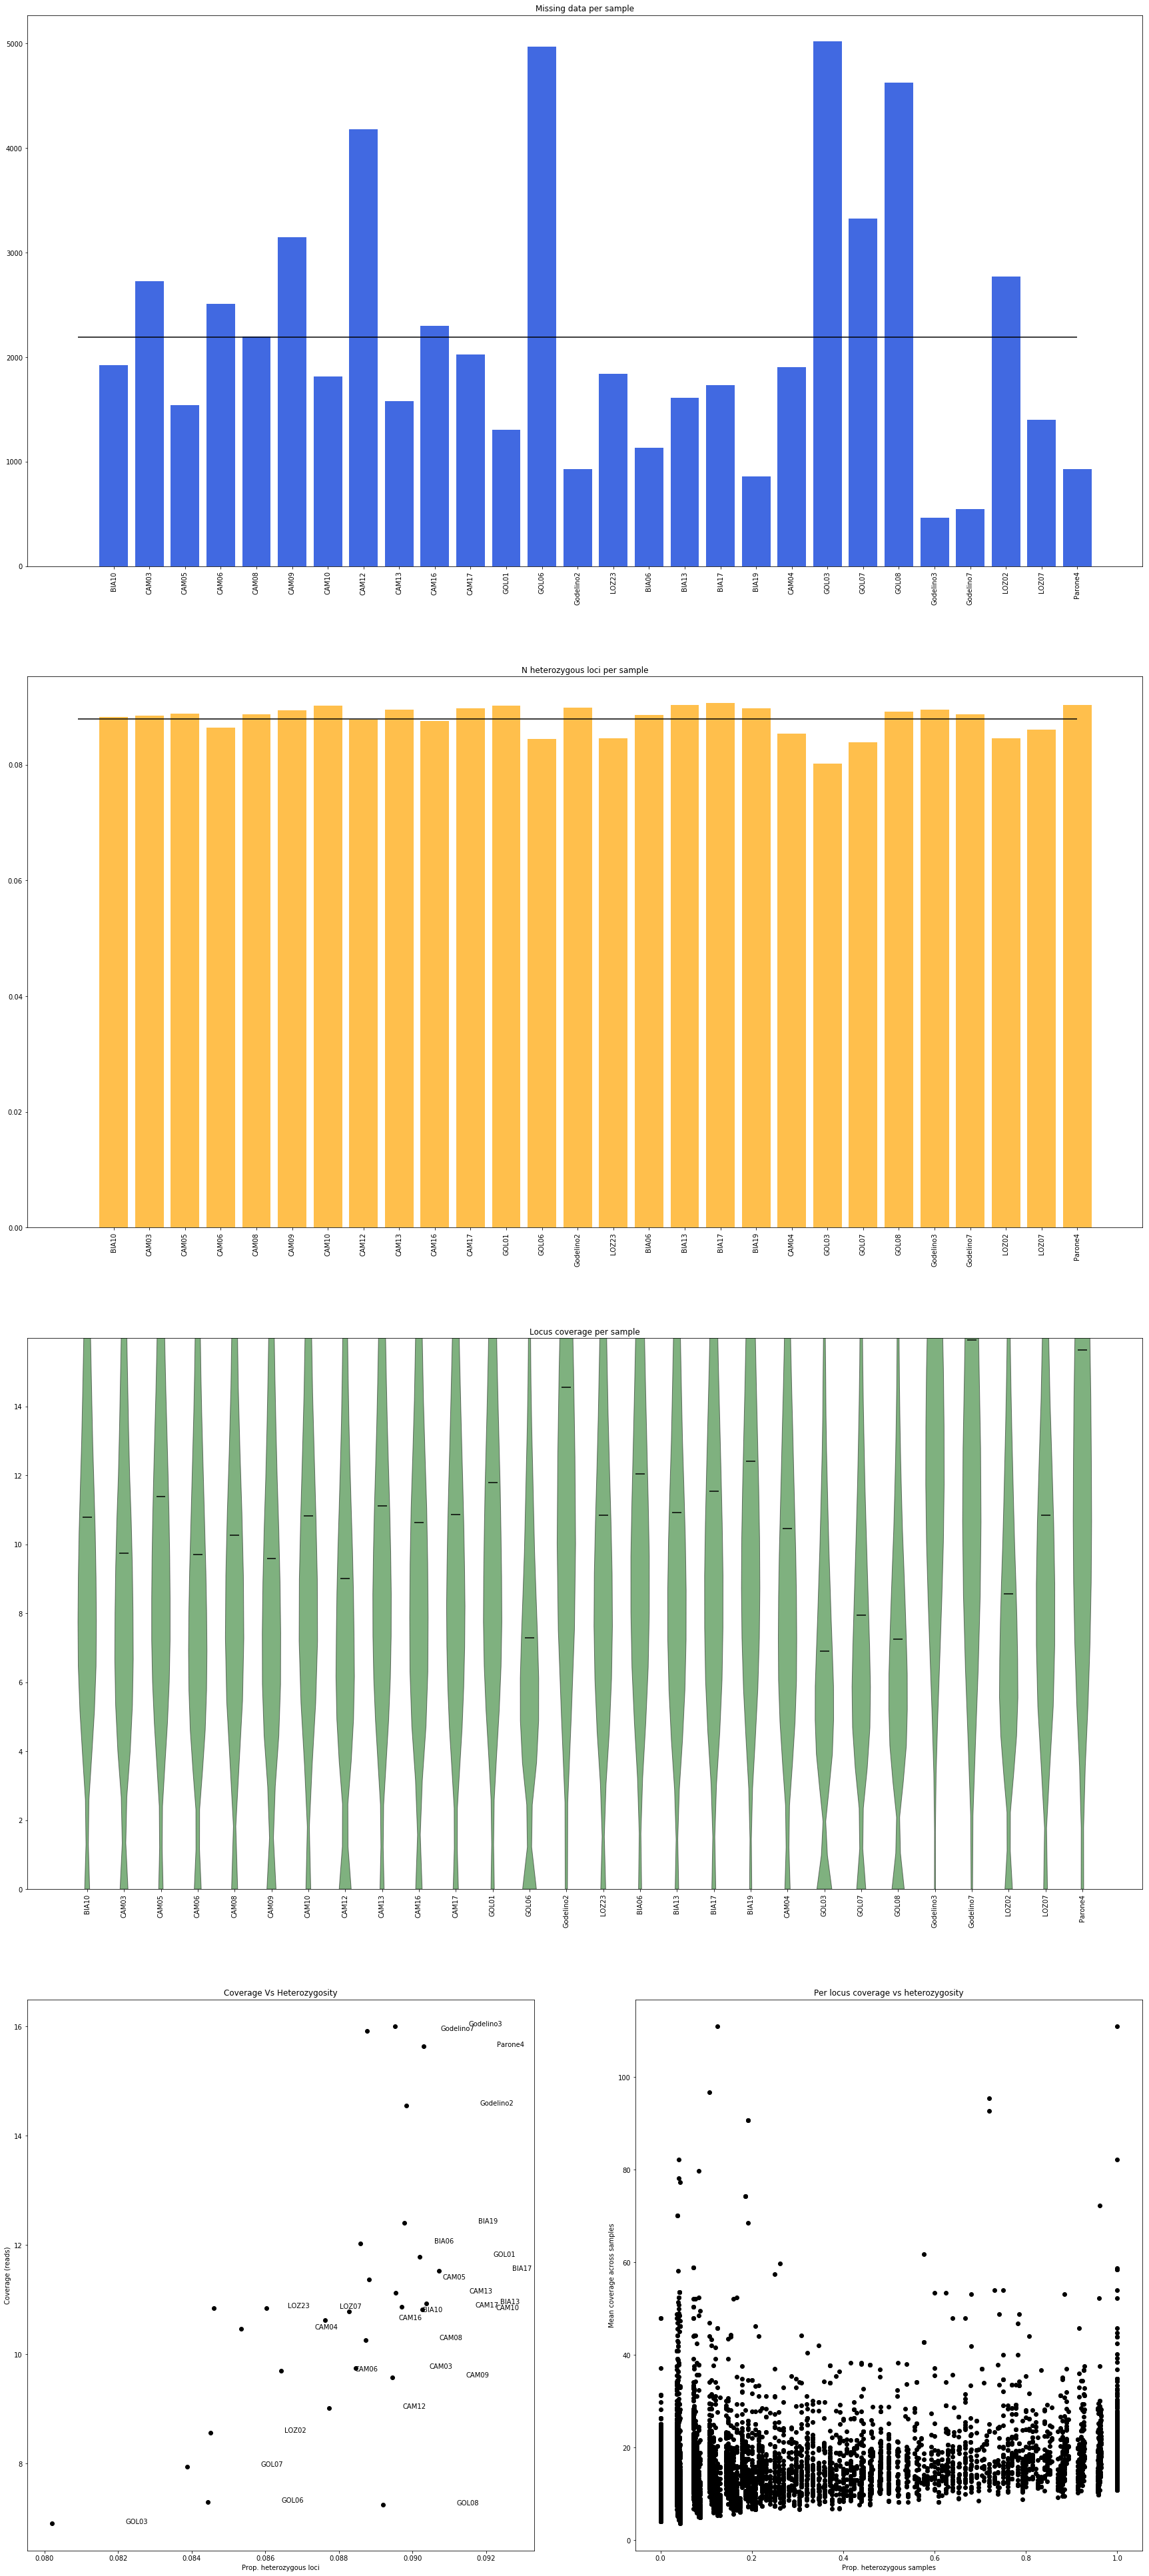

#### DONE ####

Number of Loci = 28113
Average coverage = 10.8851878389 reads


In [40]:
#help(MISC.Summary_plotter)

MISC.Summary_plotter(N_escu_vcf_path, "1111", False)

So there is some variation in sample quality here and heterozygosity does correlate with coverage a bit, which is not ideal. But we will continue with all samples and see if we need to remove any later on.

### Finding sex linked markers

In [44]:
Parameter_dict_N_escu = {}
Parameter_dict_N_escu["Name"] = "N_escu"

##### Data ########################

Parameter_dict_N_escu['Catalog'] =  catalog_path ## Path to the catalog file - used by all approaches.
Parameter_dict_N_escu['VCF'] =  N_escu_vcf_path ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_N_escu['Pop_map'] = N_escu_popmap_path ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_N_escu['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_N_escu['sample_presence_cutoff1'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_N_escu['coverage_threshold1'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_N_escu['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_N_escu['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_N_escu['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_N_escu['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_N_escu['sample_presence_cutoff2'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_N_escu['coverage_threshold2'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_N_escu['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_N_escu['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.




##### Using SNP frequency approach #### 

Number of loci = 28113
Number of samples = 28
Number of loci with too few samples = 10154
Number of loci with low MAF = 7429
Number of loci with enough data = 10529
Number of putative X linked snps = 50
Number of putative X linked tags = 50
Number of putative Z linked markers = 256
Number of putative Z linked tags = 256


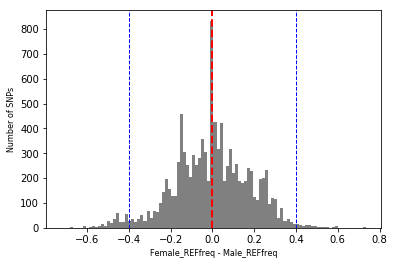


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 28113
Number of samples = 28
Number of loci with too few samples = 10154
Number of loci with low MAF = 7429
Number of loci with enough data = 10529
Number of putative X linked snps = 6
Number of putative X linked tags = 6
Number of putative Z linked markers = 5
Number of putative Z linked tags = 5

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 15
Number of males: 13
Number of Putative Y linked tags: 16
Number of Putative W linked tags: 17

 ### DONE! ###



KeyboardInterrupt: 

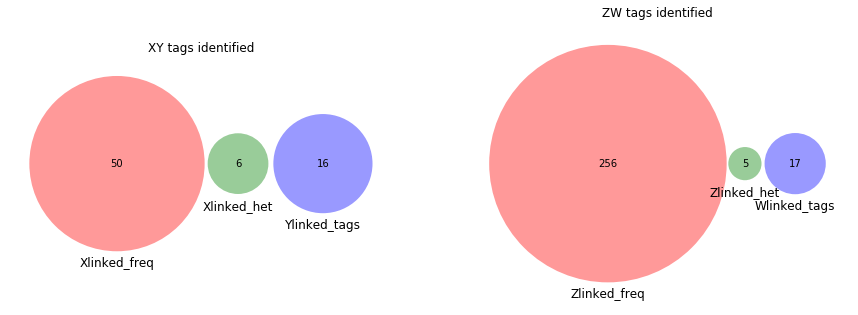

In [53]:
N_escu_XYset, N_escu_ZWset = MISC.Super_SLM_finder(Parameter_dict_N_escu, "111")

There are a lot of ZW markers in the frequency approach but this looks suspicious to me. The fact that there are almost non found by the other approaches suggests this is artifactual somehow. 

I think there are two possibilities:

1. It is driven by lower coverage in males (although then I would expect to see it in the heterozygosity approach too).
2. Males and females are distributed among populations uneavenly, and population structure will cause false positives in the frequency approach only. 

To test these two theories, I will plot M vs F coverage, and make PCA plots for each of the three regions.

## N. exculentus M vs F coverage

Number of tags =  28113
Average tag coverage 10.8851878389 (+- 5.51259268893 )


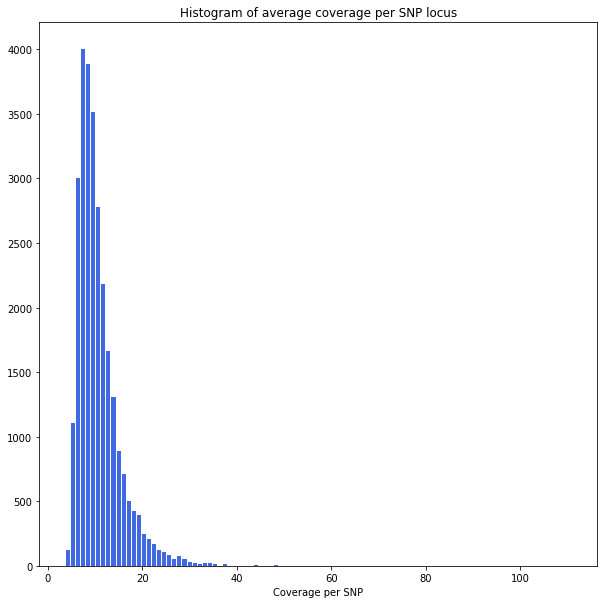

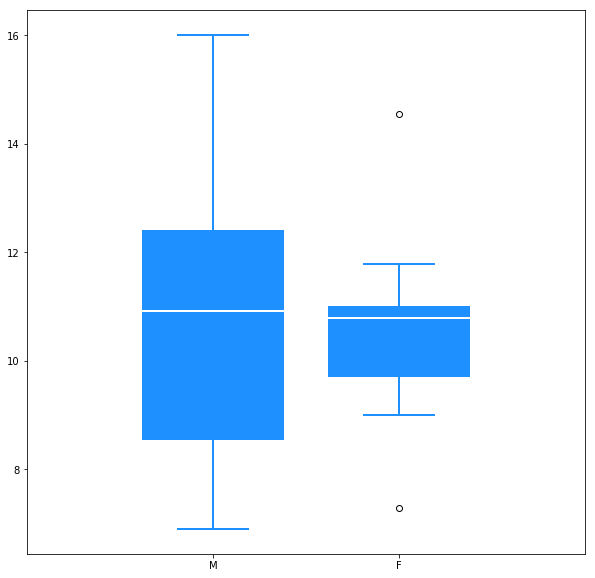

In [22]:
covs = MISC.Super_av_tag_cov(N_escu_vcf_path, popmap=N_escu_popmap_path)

There is higher variation in the male coverages here, but I don't know if that could drive this excess of ZW signal

## PCA

I will make a PCA to see if there's any structure within the males that might be getting in the way of looking for sex linked markers

In [9]:
%%bash

wd=/home/djeffrie/Data/RADseq/Water_frogs/north_esculentus  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/north_esculentus.vcf > $wd/north_esculentus_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/north_esculentus_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/north_esculentus_altered_adegenet.vcf

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/north_esculentus_altered_adegenet.vcf.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/north_esculentus_altered_adegenet.vcf
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/north_esculentus_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/north_esculentus_altered_adegenet.vcf-temporary.bed
+
/home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/north_esculentus_altered_adegenet.vcf-temporary.bim
+
/home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/north_esculentus_altered_adegenet.vcf-temporary.fam
written.
28113 variants loaded from .bim file.
28 people (0 males, 0 females, 

In [4]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Water_frogs/north_esculentus") 

## All SNPs (about 80,000)
alldata <- read.PLINK('north_esculentus_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap_north_esculentus.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



Error: package or namespace load failed for ‘adegenet’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/djeffrie/R/x86_64-pc-linux-gnu-library/3.5/sf/libs/sf.so':
  /usr/local/lib/libgdal.so.20: undefined symbol: sqlite3_column_table_name


/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error: package or namespace load failed for ‘adegenet’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/djeffrie/R/x86_64-pc-linux-gnu-library/3.5/sf/libs/sf.so':
  /usr/local/lib/libgdal.so.20: undefined symbol: sqlite3_column_table_name

  warnings.warn(x, RRuntimeWarning)


In [ ]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,3), ## which components to plot
           Title = "R_arvalis pop structure at XY loci only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

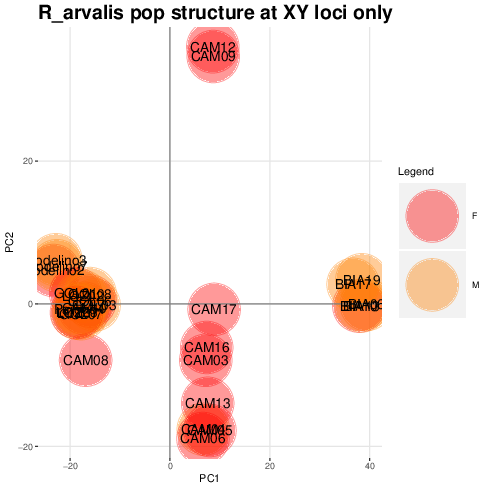

In [6]:
from wand.image import Image as WImage
img = WImage(filename='/home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/N_escu_PCA.pdf', resolution = 70) # bigger
img

(** Ignore the title of this plot, it is for this data).

It is obvious here that males and females are distributed uneavenly among genetic clusters. This I think could easily lead to false positives in the frequency approach.


## Southern Esculentus

In [29]:
S_escu_vcf_path = "%s/south_esculentus/south_esculentus.vcf" % working_dir
S_escu_popmap_path = "%s/south_esculentus/popmap_south_esculentus.txt" % working_dir

### Checking data

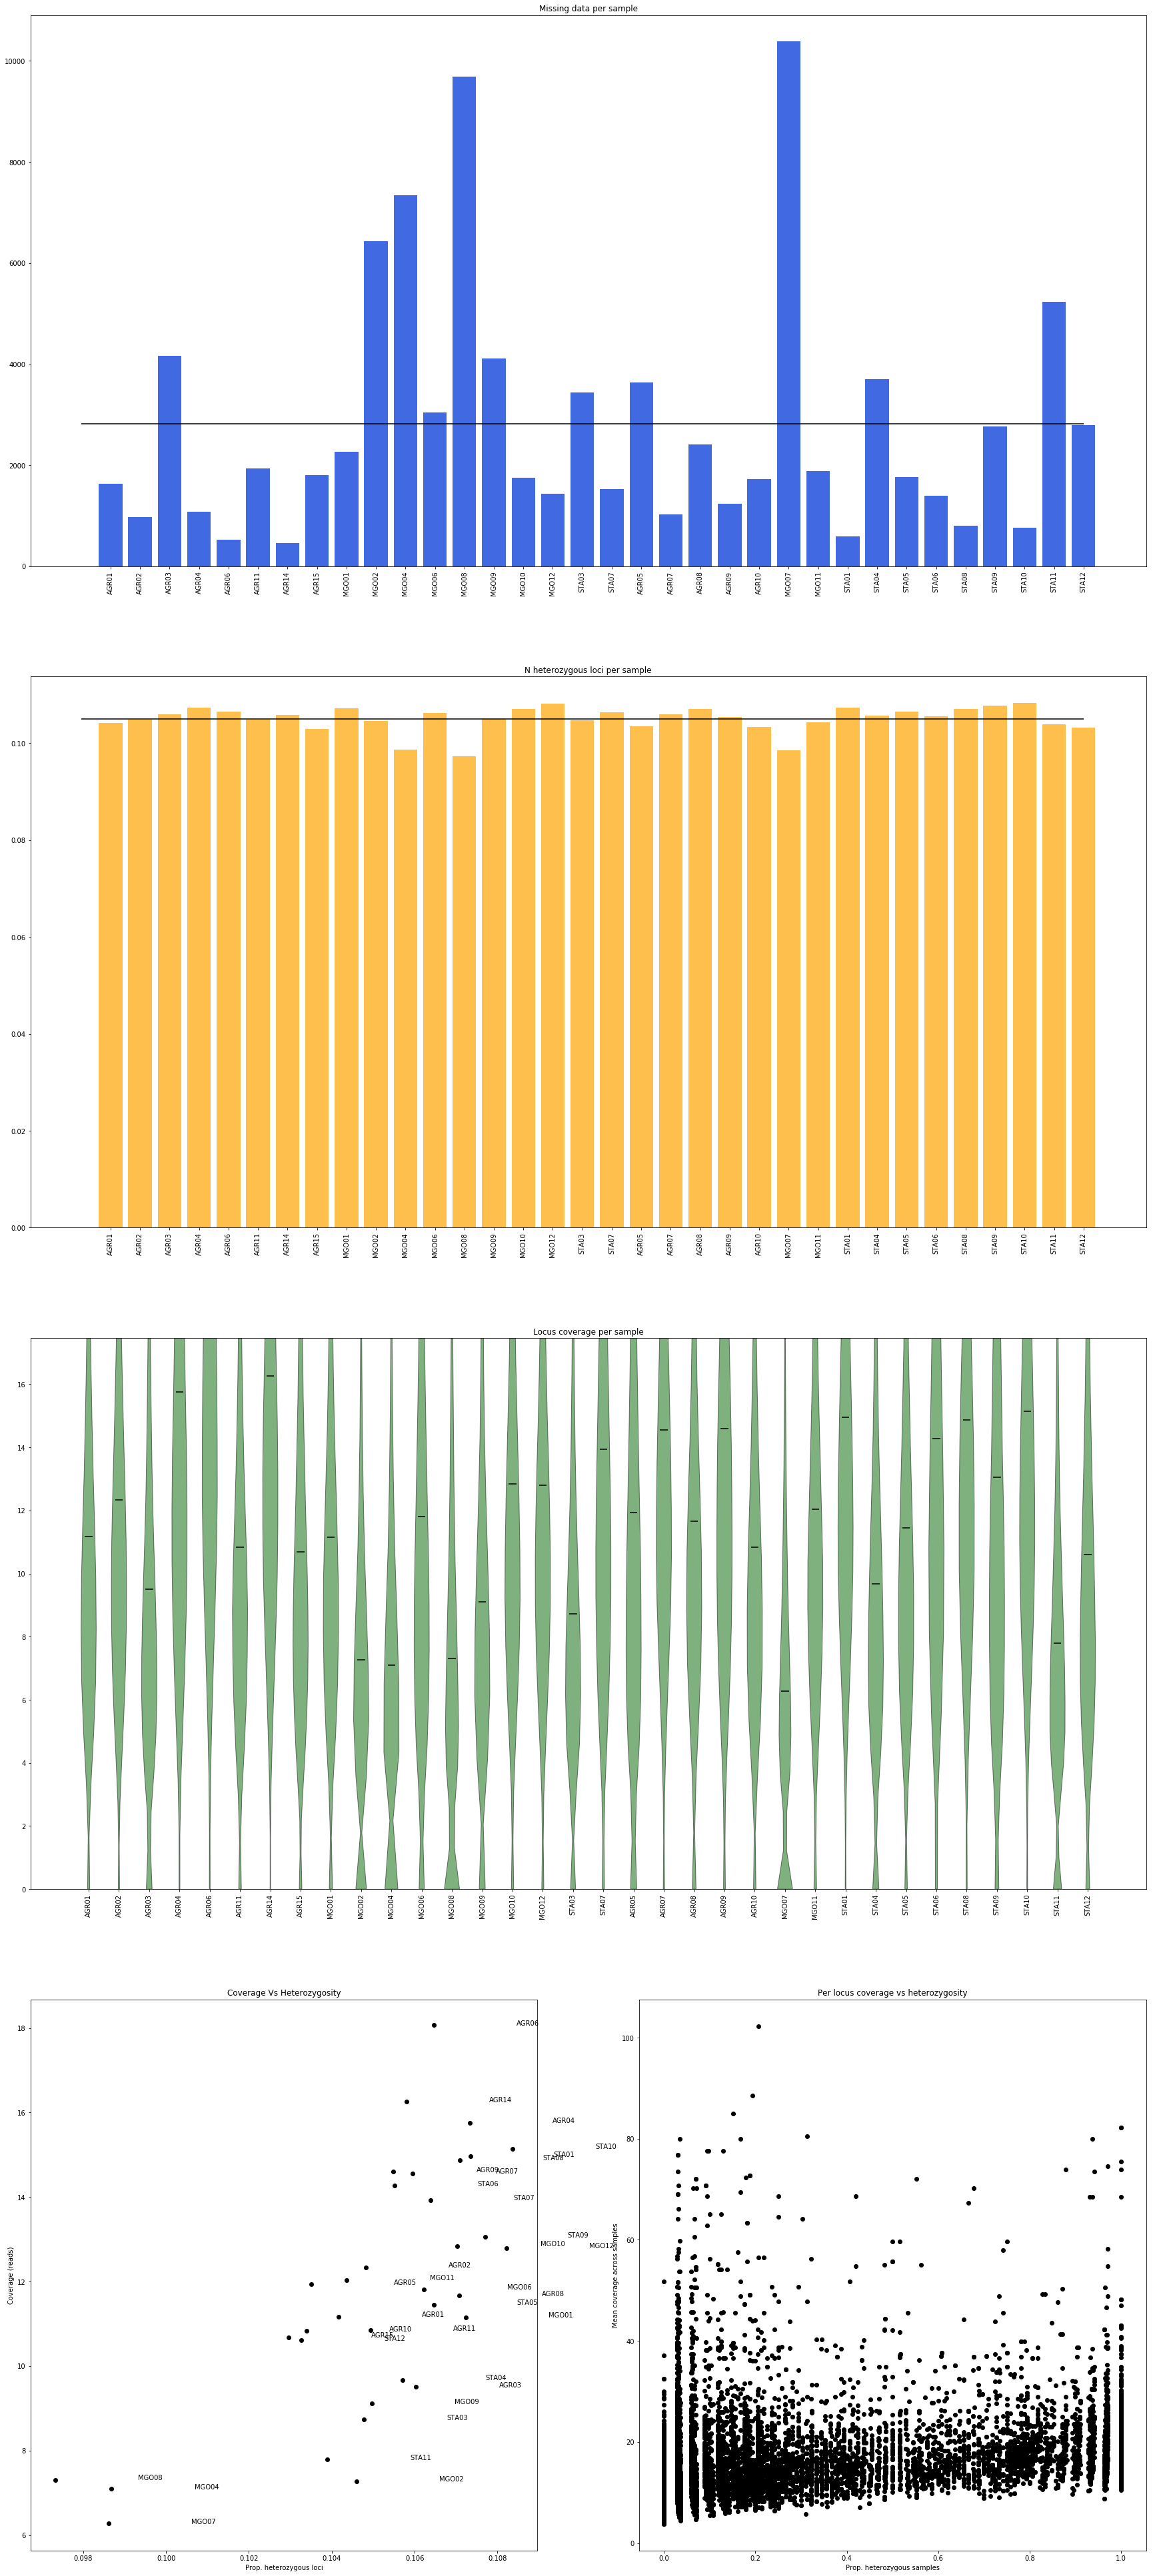

#### DONE ####

Number of Loci = 41081
Average coverage = 11.7760708042 reads


In [30]:
#help(MISC.Summary_plotter)

MISC.Summary_plotter(S_escu_vcf_path, "1111", False)

So again there is some variation in sample quality here and heterozygosity does correlate with coverage a bit, which is not ideal. But we will continue with all samples and see if we need to remove any later on.

### Finding sex linked markers

In [43]:
Parameter_dict_S_escu = {}
Parameter_dict_S_escu["Name"] = "S_escu"
##### Data ########################

Parameter_dict_S_escu['Catalog'] =  catalog_path ## Path to the catalog file - used by all approaches.
Parameter_dict_S_escu['VCF'] =  S_escu_vcf_path ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_S_escu['Pop_map'] = S_escu_popmap_path ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_S_escu['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_S_escu['sample_presence_cutoff1'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_S_escu['coverage_threshold1'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_S_escu['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_S_escu['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_S_escu['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_S_escu['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_S_escu['sample_presence_cutoff2'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_S_escu['coverage_threshold2'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_S_escu['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_S_escu['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.




##### Using SNP frequency approach #### 

Number of loci = 41081
Number of samples = 34
Number of loci with too few samples = 12286
Number of loci with low MAF = 11057
Number of loci with enough data = 17737
Number of putative X linked snps = 1566
Number of putative X linked tags = 1566
Number of putative Z linked markers = 43
Number of putative Z linked tags = 43


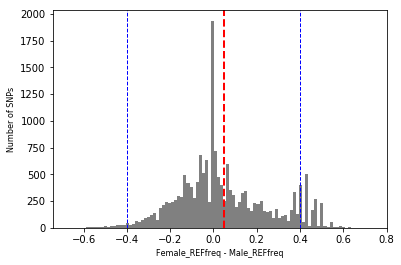


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 41081
Number of samples = 34
Number of loci with too few samples = 12286
Number of loci with low MAF = 11057
Number of loci with enough data = 17737
Number of putative X linked snps = 6
Number of putative X linked tags = 6
Number of putative Z linked markers = 4
Number of putative Z linked tags = 4

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 18
Number of males: 16
Number of Putative Y linked tags: 37
Number of Putative W linked tags: 4

 ### DONE! ###



KeyboardInterrupt: 

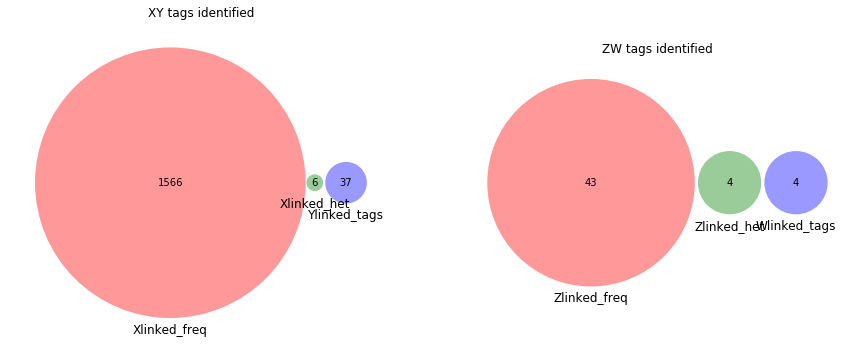

In [32]:
S_escu_XYset, S_escu_ZWset = MISC.Super_SLM_finder(Parameter_dict_S_escu, "111")

Again a huge number of XY tags only in the freq approach here. . . So I'll test again for M vs F coverage differences and population structure.

## Southern esculentus M vs F coverage

Number of tags =  41081
Average tag coverage 11.7760708042 (+- 5.7889632442 )


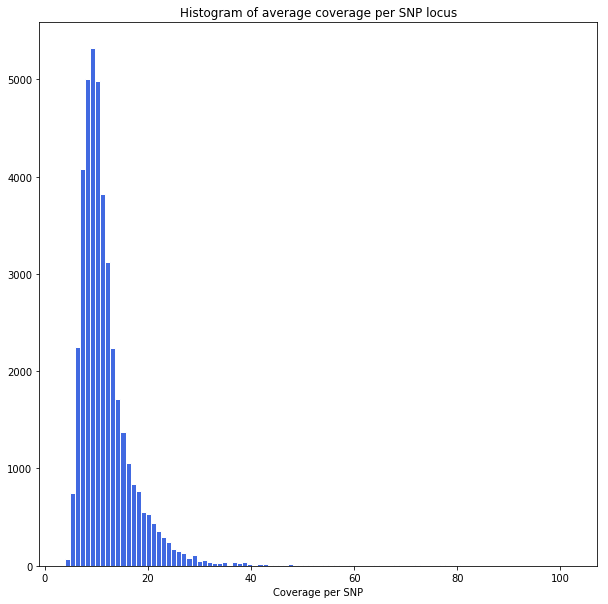

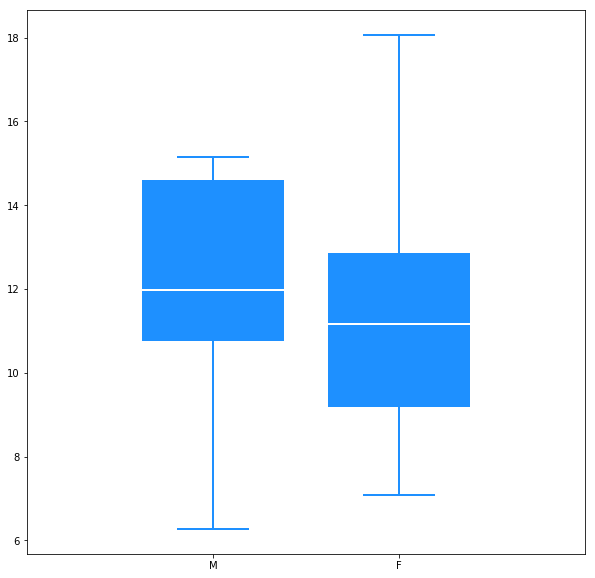

In [33]:
covs = MISC.Super_av_tag_cov(S_escu_vcf_path, popmap=S_escu_popmap_path)

Here there is a difference in the coverages between males and females. Lower coverage in females will likely result in an excess of wrongly called homozygous genotypes (i.e. a heterozygous site with a null allele), and this could certainly be contributing here.

## PCA

I will make a PCA to see if there's any structure within the males that might be getting in the way of looking for sex linked markers

In [8]:
%%bash

wd=/home/djeffrie/Data/RADseq/Water_frogs/south_esculentus  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/south_esculentus.vcf > $wd/south_esculentus_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/south_esculentus_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/south_esculentus_altered_adegenet.vcf

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/south_esculentus_altered_adegenet.vcf.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/south_esculentus_altered_adegenet.vcf
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/south_esculentus_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/south_esculentus_altered_adegenet.vcf-temporary.bed
+
/home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/south_esculentus_altered_adegenet.vcf-temporary.bim
+
/home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/south_esculentus_altered_adegenet.vcf-temporary.fam
written.
41081 variants loaded from .bim file.
34 people (0 males, 0 females, 

In [4]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Water_frogs/south_esculentus") 

## All SNPs (about 80,000)
alldata <- read.PLINK('south_esculentus_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap_south_esculentus.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



Error: package or namespace load failed for ‘adegenet’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/djeffrie/R/x86_64-pc-linux-gnu-library/3.5/sf/libs/sf.so':
  /usr/local/lib/libgdal.so.20: undefined symbol: sqlite3_column_table_name


/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error: package or namespace load failed for ‘adegenet’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/djeffrie/R/x86_64-pc-linux-gnu-library/3.5/sf/libs/sf.so':
  /usr/local/lib/libgdal.so.20: undefined symbol: sqlite3_column_table_name

  warnings.warn(x, RRuntimeWarning)


In [ ]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,3), ## which components to plot
           Title = "S_escu_PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

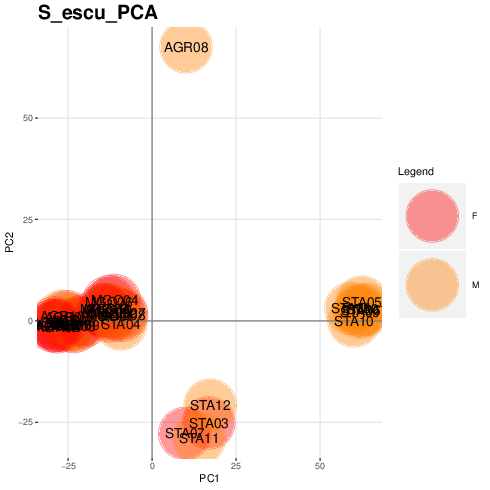

In [9]:
from wand.image import Image as WImage
img = WImage(filename='/home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/S_escu_PCA.pdf', resolution = 70) # bigger
img

Again there is uneaven distribution of males and females across clusters here, so this I think is also a cause of these false positives. 

## Northern lessonae

In [34]:
N_less_vcf_path = "%s/north_lessonae/lessonae.vcf" % working_dir
N_less_popmap_path = "%s/north_lessonae/popmap_lessonae.txt" % working_dir

### Checking data

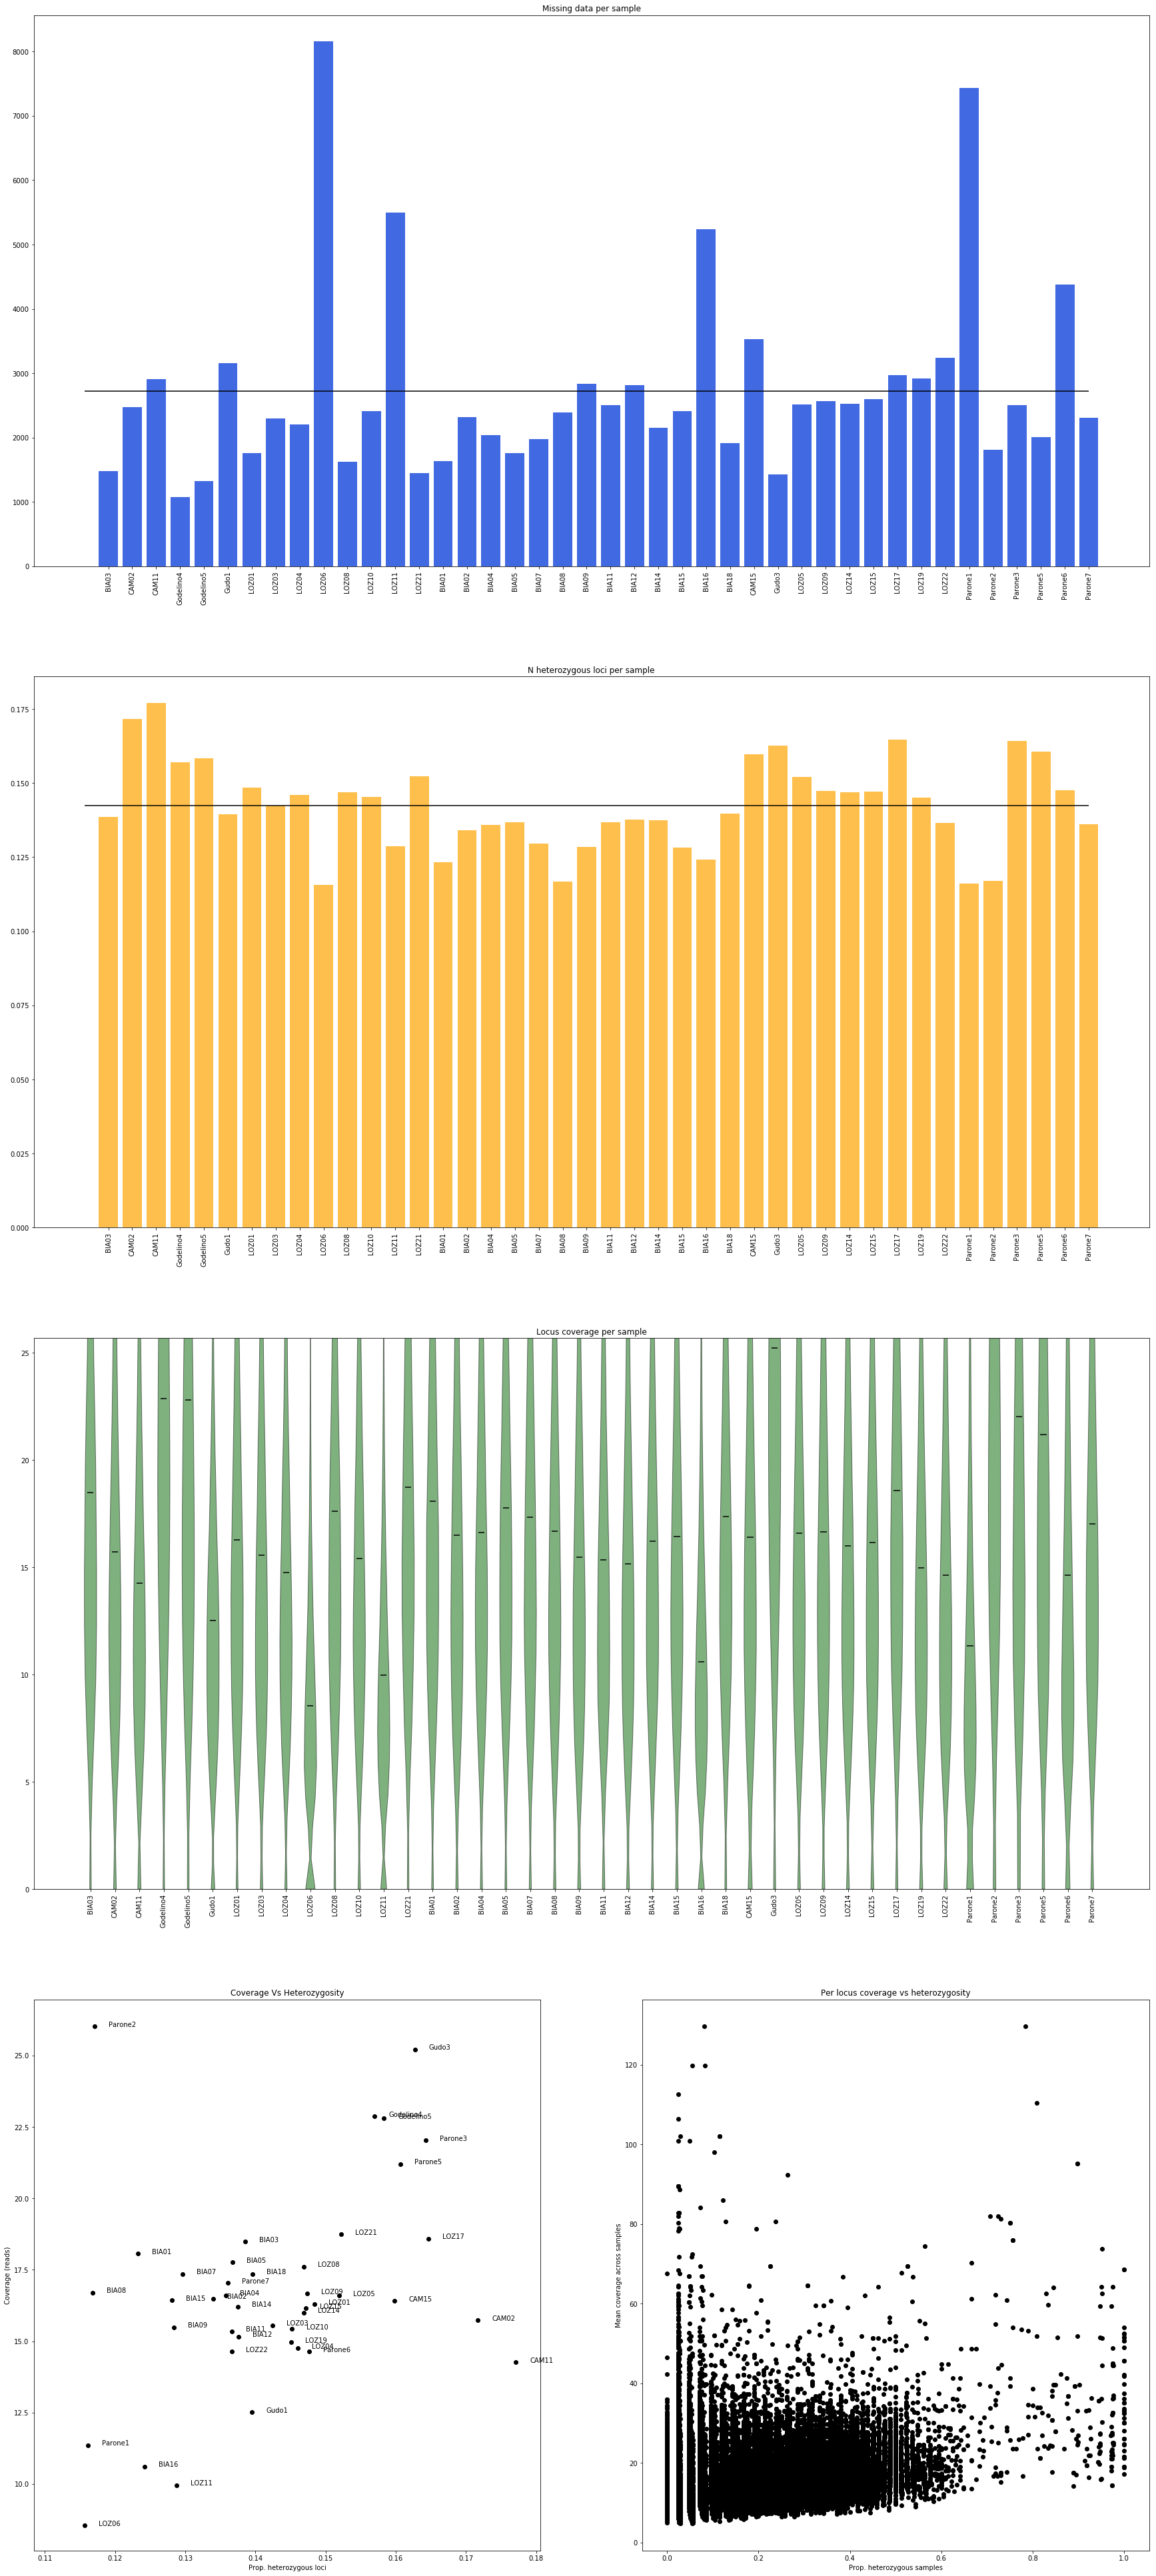

#### DONE ####

Number of Loci = 49674
Average coverage = 16.6814478016 reads


In [39]:
MISC.Summary_plotter(N_less_vcf_path, "1111", False)

So there is some variation in sample quality here and heterozygosity does correlate with coverage a bit, which is not ideal. But we will continue with all samples and see if we need to remove any later on.

### Finding sex linked markers

In [42]:
Parameter_dict_N_less = {}
Parameter_dict_N_less["Name"] = "N_less"

##### Data ########################

Parameter_dict_N_less['Catalog'] =  catalog_path ## Path to the catalog file - used by all approaches.
Parameter_dict_N_less['VCF'] =  N_less_vcf_path ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_N_less['Pop_map'] = N_less_popmap_path ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_N_less['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_N_less['sample_presence_cutoff1'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_N_less['coverage_threshold1'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_N_less['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_N_less['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_N_less['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_N_less['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_N_less['sample_presence_cutoff2'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_N_less['coverage_threshold2'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_N_less['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_N_less['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.




##### Using SNP frequency approach #### 

Number of loci = 49674
Number of samples = 42
Number of loci with too few samples = 3123
Number of loci with low MAF = 23678
Number of loci with enough data = 22872
Number of putative X linked snps = 14
Number of putative X linked tags = 14
Number of putative Z linked markers = 7
Number of putative Z linked tags = 7


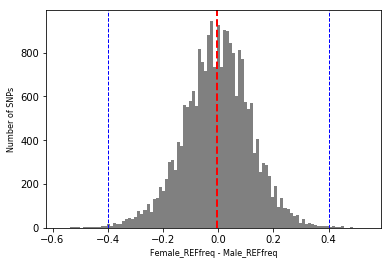


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 49674
Number of samples = 42
Number of loci with too few samples = 3123
Number of loci with low MAF = 23678
Number of loci with enough data = 22872
Number of putative X linked snps = 11
Number of putative X linked tags = 11
Number of putative Z linked markers = 4
Number of putative Z linked tags = 4

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 14
Number of males: 28
Number of Putative Y linked tags: 7
Number of Putative W linked tags: 1

 ### DONE! ###



KeyboardInterrupt: 

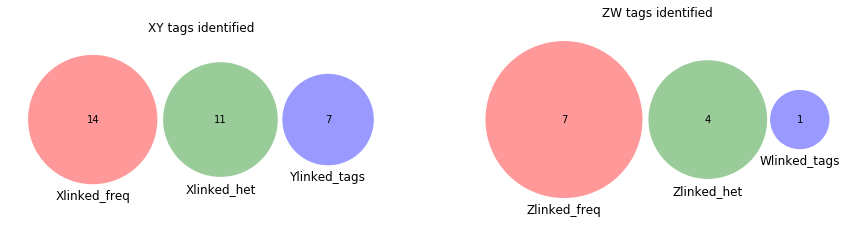

In [38]:
N_less_XYset, N_less_ZWset = MISC.Super_SLM_finder(Parameter_dict_N_less, "111")

There isn't a big bias here, but I will check populations structure just in case. 

## PCA

I will make a PCA to see if there's any structure within the males that might be getting in the way of looking for sex linked markers

In [11]:
%%bash

wd=/home/djeffrie/Data/RADseq/Water_frogs/north_lessonae  ## just change this line

## XY only data 
sed 's/_/-/g' $wd/lessonae.vcf > $wd/north_lessonae_altered_adegenet.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/north_lessonae_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/north_lessonae_altered_adegenet.vcf

PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/north_lessonae_altered_adegenet.vcf.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/north_lessonae_altered_adegenet.vcf
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/north_lessonae_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/north_lessonae_altered_adegenet.vcf-temporary.bed
+
/home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/north_lessonae_altered_adegenet.vcf-temporary.bim
+
/home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/north_lessonae_altered_adegenet.vcf-temporary.fam
written.
49674 variants loaded from .bim file.
42 people (0 males, 0 females, 42 ambiguous) loaded fro

bash: line 3: north_lessonae/popmap_lessonae.txt: No such file or directory


In [4]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.R")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Water_frogs/north_lessonae") 

## All SNPs (about 80,000)
alldata <- read.PLINK('north_lessonae_altered_adegenet.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("popmap_lessonae.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 



Error: package or namespace load failed for ‘adegenet’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/djeffrie/R/x86_64-pc-linux-gnu-library/3.5/sf/libs/sf.so':
  /usr/local/lib/libgdal.so.20: undefined symbol: sqlite3_column_table_name


/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error: package or namespace load failed for ‘adegenet’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/djeffrie/R/x86_64-pc-linux-gnu-library/3.5/sf/libs/sf.so':
  /usr/local/lib/libgdal.so.20: undefined symbol: sqlite3_column_table_name

  warnings.warn(x, RRuntimeWarning)


In [ ]:
%%R -w 50 -h 50 -u cm

## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,3), ## which components to plot
           Title = "N_less_PCA", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

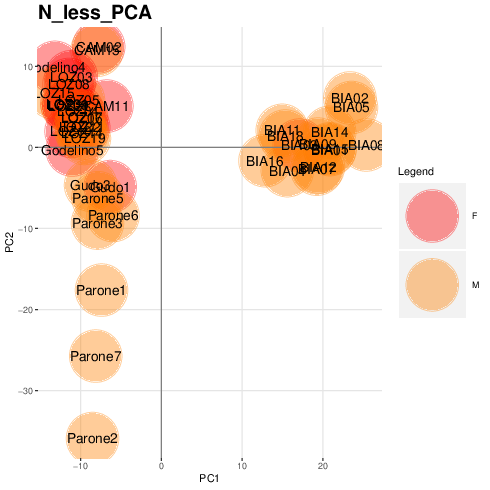

In [29]:
from wand.image import Image as WImage
img = WImage(filename='/home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/N_less_PCA.pdf', resolution = 70) # bigger
img

So there is still some bias of males and females across clusters. This might be reducing power/ increasing noise here, but at least it doesn't seem to be causing too many false positives here. 

## Subsampling

From here, the next best step is to subsample the above 3 datasets to include as many males and females from a **single** population as possible in the sex linked marker tests. 

Below I will run these tests on such subsamples. 

### Northern esculentus subsample

In [39]:
N_escu_vcf_path = "/home/djeffrie/Data/RADseq/Water_frogs/Subsampled/Northern_esculentus/Dan_north_esculentus_kept.vcf"
N_escu_popmap_path = "/home/djeffrie/Data/RADseq/Water_frogs/Subsampled/Northern_esculentus/popmap_north_esculentus_kept.txt"



##### Using SNP frequency approach #### 

Number of loci = 18327
Number of samples = 13
Number of loci with too few samples = 8304
Number of loci with low MAF = 1906
Number of loci with enough data = 8116
Number of putative X linked snps = 145
Number of putative X linked tags = 145
Number of putative Z linked markers = 163
Number of putative Z linked tags = 163


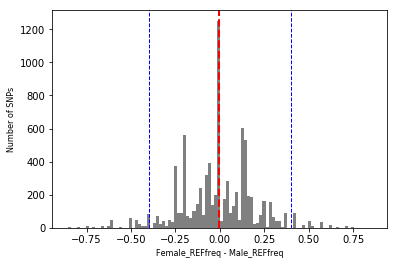


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 18327
Number of samples = 13
Number of loci with too few samples = 8239
Number of loci with low MAF = 1906
Number of loci with enough data = 8116
Number of putative X linked snps = 10
Number of putative X linked tags = 10
Number of putative Z linked markers = 8
Number of putative Z linked tags = 8

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 5
Number of males: 8
Number of Putative Y linked tags: 568
Number of Putative W linked tags: 132

 ### DONE! ###



KeyboardInterrupt: 

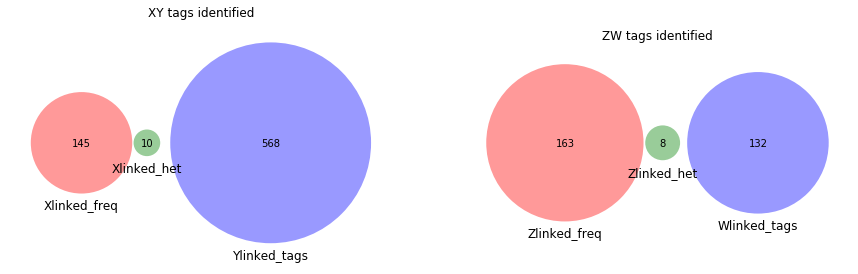

In [40]:
Parameter_dict_N_escu_sub = {}
Parameter_dict_N_escu_sub["Name"] = "N_escu_sub"

##### Data ########################

Parameter_dict_N_escu_sub['Catalog'] =  catalog_path ## Path to the catalog file - used by all approaches.
Parameter_dict_N_escu_sub['VCF'] =  N_escu_vcf_path ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_N_escu_sub['Pop_map'] = N_escu_popmap_path ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_N_escu_sub['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_N_escu_sub['sample_presence_cutoff1'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_N_escu_sub['coverage_threshold1'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_N_escu_sub['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_N_escu_sub['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_N_escu_sub['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_N_escu_sub['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_N_escu_sub['sample_presence_cutoff2'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_N_escu_sub['coverage_threshold2'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_N_escu_sub['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_N_escu_sub['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.


N_escu_sub_XYset, N_escu_sub_ZWset = MISC.Super_SLM_finder(Parameter_dict_N_escu_sub, "111")

## Southern esculentus subsample

In [42]:
S_escu_sub_vcf_path = "/home/djeffrie/Data/RADseq/Water_frogs/Subsampled/Southern_esculentus/Dan_south_esculentus_kept.vcf"
S_escu_sub_popmap_path = "/home/djeffrie/Data/RADseq/Water_frogs/Subsampled/Southern_esculentus/popmap_south_esculentus_kept.txt"

In [43]:
Parameter_dict_S_escu_sub = {}
Parameter_dict_S_escu_sub["Name"] = "S_escu_sub"
##### Data ########################

Parameter_dict_S_escu_sub['Catalog'] =  catalog_path ## Path to the catalog file - used by all approaches.
Parameter_dict_S_escu_sub['VCF'] =  S_escu_sub_vcf_path ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_S_escu_sub['Pop_map'] = S_escu_sub_popmap_path ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_S_escu_sub['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_S_escu_sub['sample_presence_cutoff1'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_S_escu_sub['coverage_threshold1'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_S_escu_sub['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_S_escu_sub['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_S_escu_sub['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_S_escu_sub['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_S_escu_sub['sample_presence_cutoff2'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_S_escu_sub['coverage_threshold2'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_S_escu_sub['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_S_escu_sub['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.




##### Using SNP frequency approach #### 

Number of loci = 31831
Number of samples = 23
Number of loci with too few samples = 10797
Number of loci with low MAF = 7429
Number of loci with enough data = 13604
Number of putative X linked snps = 46
Number of putative X linked tags = 46
Number of putative Z linked markers = 51
Number of putative Z linked tags = 51


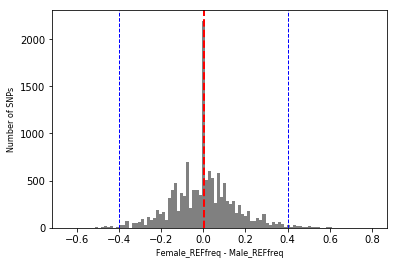


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 31831
Number of samples = 23
Number of loci with too few samples = 10792
Number of loci with low MAF = 7429
Number of loci with enough data = 13604
Number of putative X linked snps = 3
Number of putative X linked tags = 3
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 16
Number of males: 7
Number of Putative Y linked tags: 5
Number of Putative W linked tags: 103

 ### DONE! ###



KeyboardInterrupt: 

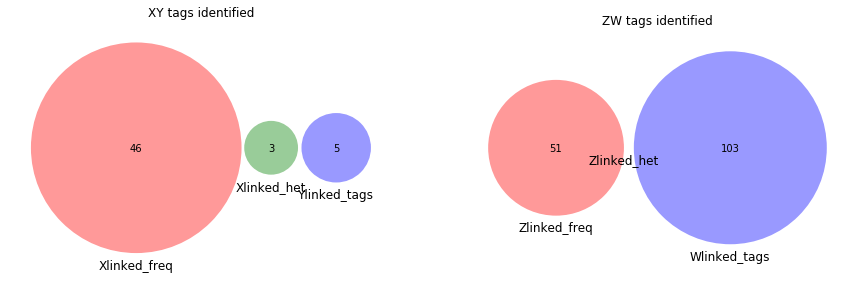

In [45]:
S_escu_sub_XYset, S_escu_sub_ZWset = MISC.Super_SLM_finder(Parameter_dict_S_escu_sub, "111")

## Lessonae subsample

In [46]:
N_less_sub_vcf_path = "/home/djeffrie/Data/RADseq/Water_frogs/Subsampled/Northern_lessonae/Dan_lessonae_kept.vcf"
N_less_sub_popmap_path = "/home/djeffrie/Data/RADseq/Water_frogs/Subsampled/Northern_lessonae/popmap_lessonae_kept.txt"

In [51]:
Parameter_dict_N_less_sub = {}
Parameter_dict_N_less_sub["Name"] = "N_less_sub"

##### Data ########################

Parameter_dict_N_less_sub['Catalog'] =  catalog_path ## Path to the catalog file - used by all approaches.
Parameter_dict_N_less_sub['VCF'] =  N_less_sub_vcf_path ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_N_less_sub['Pop_map'] = N_less_sub_popmap_path ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_N_less_sub['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_N_less_sub['sample_presence_cutoff1'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_N_less_sub['coverage_threshold1'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_N_less_sub['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_N_less_sub['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_N_less_sub['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_N_less_sub['heterogamtic_heterozygosity_threshold'] = 0.7 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_N_less_sub['sample_presence_cutoff2'] = 0.8 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_N_less_sub['coverage_threshold2'] = 6 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_N_less_sub['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_N_less_sub['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.




##### Using SNP frequency approach #### 

Number of loci = 45870
Number of samples = 25
Number of loci with too few samples = 2625
Number of loci with low MAF = 19660
Number of loci with enough data = 23584
Number of putative X linked snps = 26
Number of putative X linked tags = 26
Number of putative Z linked markers = 9
Number of putative Z linked tags = 9


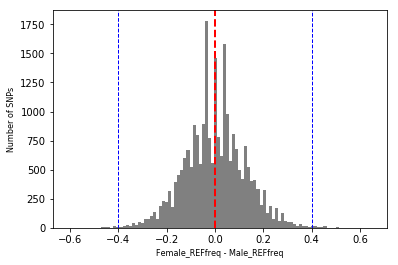


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 45870
Number of samples = 25
Number of loci with too few samples = 2625
Number of loci with low MAF = 19660
Number of loci with enough data = 23584
Number of putative X linked snps = 10
Number of putative X linked tags = 10
Number of putative Z linked markers = 6
Number of putative Z linked tags = 6

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 13
Number of males: 12
Number of Putative Y linked tags: 19
Number of Putative W linked tags: 5

 ### DONE! ###



KeyboardInterrupt: 

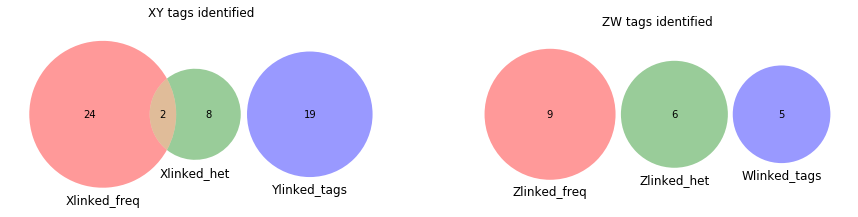

In [52]:
N_less_sub_XYset, N_less_sub_ZWset = MISC.Super_SLM_finder(Parameter_dict_N_less_sub, "111")

### Randomisations

Below are the randomisations for the whole datasets. But note that Randomisations will not help in the situation where sampling biases of males and females exist across populations, as it is actually that specific combination that is causing the signal. Just not because of sex linkage.


Here we will perform a permutation test for the sex linked marker analyses. Essentially we just shuffle the assignments of "male" and "female" across the samples to obtain a null distribution for the number of "sex linked" markers expected at random. 

In [ ]:
## Define a program to help parallelise the analyses

def Super_SLM_finder_parallel(popmap, Parameter_dict):
    import os
    
    Parameter_dict['Pop_map'] = popmap
    Parameter_dict['VCF'] = "%s.vcf" % popmap.rpartition(".")[0]
    results_dict = {}
    results_dict["XYset"], results_dict["ZWset"], results_dict["Detailed"] = SLMF_L.Super_SLM_finder(Parameter_dict, "111", verbose = False, write_files=False, plot=False)
    
    os.remove(Parameter_dict['VCF']) ## remove VCFs as they are used
    os.remove("%s.altered" % Parameter_dict['VCF'])
    os.remove("%s.all_frequencies.tsv" % Parameter_dict['VCF'])
    

    return results_dict

In [50]:
Parameter_dictionaries = []

Parameter_dictionaries.append(Parameter_dict_N_escu)
Parameter_dictionaries.append(Parameter_dict_S_escu)
Parameter_dictionaries.append(Parameter_dict_N_less)


In [51]:
from joblib import Parallel, delayed
import multiprocessing
import os
import shutil
from random import shuffle
import SLMF_lightweight as SLMF_L

results_dict = {}

for dataset in Parameter_dictionaries:
    print "processing dataset in", dataset["VCF"]
    # 1. Make a new directory next in the VCF path. 
    Randomisation_dir = "%s/Randomisations" % dataset["VCF"].rpartition("/")[0]
    if not os.path.exists(Randomisation_dir):
        os.makedirs(Randomisation_dir)
    
    # 2. Copy sex info and VCF into that folder
    
    shutil.copyfile(dataset["Pop_map"], "%s/Sex_ID_info.txt" % Randomisation_dir)  ## sex info
    shutil.copyfile(dataset["VCF"], "%s/batch_1.vcf" % Randomisation_dir)  ## sex info
    
    orig_vcf = "%s/batch_1.vcf" % Randomisation_dir
    
    print "\nRandomisations happening in %s" % Randomisation_dir
    
    ## 3. Make the randomised sex info files

    orig_popmap_path = "%s/Sex_ID_info.txt" % Randomisation_dir
    orig_popmap = open(orig_popmap_path, 'r').readlines()

    sexes = []
    samples = []
    IDs = []
    randomisations = []

    for line in orig_popmap:
        sexes.append(line.strip().split()[1])
        samples.append(line.strip().split()[0])
        IDs.append(line.strip().split()[2])

    popmaps = []
    for i in range(100):
        popmap_path = "%s/rand_popmap_%s.txt" % (Randomisation_dir, i)
        popmaps.append(popmap_path)
        rand_popmap = open(popmap_path, 'w')
        shuffle(sexes)
        randomisations.append(sexes)
        
        for i in range(len(samples)):
            rand_popmap.write("%s\t%s\t%s\n" % (samples[i], sexes[i], IDs[i]))

        rand_popmap.close()
    
    print "\nRandom sex info files made"
    
    ## make new VCFs for parallelised analyses
    
    for i in popmaps:
        new_vcf = "%s.vcf" % i.rpartition(".")[0]
        shutil.copyfile(orig_vcf, new_vcf)
        
    ## 4. Run the randomisations
    
    print "\nRunning randomisations\n"
    
    results_dict[dataset["Name"]] = Parallel(n_jobs=4, verbose = 1)(delayed(Super_SLM_finder_parallel)(i, dataset) for i in popmaps)
    
    ## 5. Output the results for each species after the species is complete (i.e. checkpoints)
    
    outfile = open("%s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"]), 'w')
    
    for Randomisation in results_dict[dataset["Name"]]:

        XYfreq = len(Randomisation["Detailed"]["XY"]["freq"])
        XYhet = len(Randomisation["Detailed"]["XY"]["het"])
        Ytags = len(Randomisation["Detailed"]["XY"]["Ytags"])
    
        ZWfreq = len(Randomisation["Detailed"]["ZW"]["freq"])
        ZWhet = len(Randomisation["Detailed"]["ZW"]["het"])
        Wtags = len(Randomisation["Detailed"]["ZW"]["Wtags"])
                
        line = "%s\t%s\t%s\t%s\t%s\t%s\t%s\n" % (dataset["Name"],XYfreq,XYhet,Ytags,ZWfreq,ZWhet,Wtags)
    
        outfile.write(line)
        
    outfile.close()
    
    print "Results outputted to %s/Randomisations_%s.txt" % (Randomisation_dir, dataset["Name"])
    
    
    

processing dataset in /home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/north_esculentus.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 44
Final number of ZW tags = 57
Final number of XY tags = 29
Final number of ZW tags = 27
Final number of XY tags = 28
Final number of ZW tags = 42
Final number of XY tags = 21
Final number of ZW tags = 30
Final number of XY tags = 15
Final number of ZW tags = 58
Final number of XY tags = 25
Final number of ZW tags = 24
Final number of XY tags = 20
Final number of ZW tags = 35
Final number of XY tags = 418
Final number of ZW tags = 56
Final number of XY tags = 16
Final number of ZW tags = 19
Final number of XY tags = 15
Final number of ZW tags = 25
Final number of XY tags = 334
Final number of ZW tags = 38
Final number of XY tags = 49
Final number of ZW tags = 73
Final number of XY tags = 21
Final number of ZW ta

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 12.9min


Final number of XY tags = 42
Final number of ZW tags = 24
Final number of XY tags = 26
Final number of ZW tags = 29
Final number of XY tags = 19
Final number of ZW tags = 23
Final number of XY tags = 20
Final number of ZW tags = 36
Final number of XY tags = 29
Final number of ZW tags = 21
Final number of XY tags = 57
Final number of ZW tags = 94
Final number of XY tags = 25
Final number of ZW tags = 27
Final number of XY tags = 16
Final number of ZW tags = 10
Final number of XY tags = 19
Final number of ZW tags = 46
Final number of XY tags = 13
Final number of ZW tags = 28
Final number of XY tags = 32
Final number of ZW tags = 35
Final number of XY tags = 20
Final number of ZW tags = 45
Final number of XY tags = 40
Final number of ZW tags = 42
Final number of XY tags = 11
Final number of ZW tags = 22
Final number of XY tags = 45
Final number of ZW tags = 66
Final number of XY tags = 37
Final number of ZW tags = 24
Final number of XY tags = 24
Final number of ZW tags = 41
Final number o

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 29.7min finished


Results outputted to /home/djeffrie/Data/RADseq/Water_frogs/north_esculentus/Randomisations/Randomisations_N_escu.txt
processing dataset in /home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/south_esculentus.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 16
Final number of ZW tags = 24
Final number of XY tags = 9
Final number of ZW tags = 15
Final number of XY tags = 7
Final number of ZW tags = 3
Final number of XY tags = 9
Final number of ZW tags = 35
Final number of XY tags = 17
Final number of ZW tags = 15
Final number of XY tags = 9
Final number of ZW tags = 10
Final number of XY tags = 7
Final number of ZW tags = 6
Final number of XY tags = 11
Final number of ZW tags = 6
Final number of XY tags = 41
Final number of ZW tags = 1017
Final number of XY tags = 10
Final number of ZW tags = 10
Final number of XY tags = 11
Final number of ZW tags = 7

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 20.4min


Final number of XY tags = 3
Final number of ZW tags = 15
Final number of XY tags = 9
Final number of ZW tags = 6
Final number of XY tags = 3
Final number of ZW tags = 10
Final number of XY tags = 124
Final number of ZW tags = 82
Final number of XY tags = 8
Final number of ZW tags = 2
Final number of XY tags = 11
Final number of ZW tags = 15
Final number of XY tags = 3
Final number of ZW tags = 10
Final number of XY tags = 42
Final number of ZW tags = 24
Final number of XY tags = 10
Final number of ZW tags = 21
Final number of XY tags = 12
Final number of ZW tags = 14
Final number of XY tags = 3
Final number of ZW tags = 7
Final number of XY tags = 11
Final number of ZW tags = 15
Final number of XY tags = 3
Final number of ZW tags = 7
Final number of XY tags = 25
Final number of ZW tags = 30
Final number of XY tags = 22
Final number of ZW tags = 60
Final number of XY tags = 14
Final number of ZW tags = 12
Final number of XY tags = 3
Final number of ZW tags = 19
Final number of XY tags =

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 46.3min finished


Results outputted to /home/djeffrie/Data/RADseq/Water_frogs/south_esculentus/Randomisations/Randomisations_S_escu.txt
processing dataset in /home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/lessonae.vcf

Randomisations happening in /home/djeffrie/Data/RADseq/Water_frogs/north_lessonae/Randomisations

Random sex info files made

Running randomisations

Final number of XY tags = 4
Final number of ZW tags = 1
Final number of XY tags = 4
Final number of ZW tags = 3
Final number of XY tags = 8
Final number of ZW tags = 0
Final number of XY tags = 12
Final number of ZW tags = 4
Final number of XY tags = 14
Final number of ZW tags = 2
Final number of XY tags = 5
Final number of ZW tags = 0
Final number of XY tags = 5
Final number of ZW tags = 1
Final number of XY tags = 2
Final number of ZW tags = 5
Final number of XY tags = 0
Final number of ZW tags = 0
Final number of XY tags = 4
Final number of ZW tags = 0
Final number of XY tags = 7
Final number of ZW tags = 5
Final number of XY tags 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 28.2min


Final number of XY tags = 11
Final number of ZW tags = 5
Final number of XY tags = 14
Final number of ZW tags = 4
Final number of XY tags = 7
Final number of ZW tags = 2
Final number of XY tags = 3
Final number of ZW tags = 6
Final number of XY tags = 4
Final number of ZW tags = 2
Final number of XY tags = 16
Final number of ZW tags = 6
Final number of XY tags = 5
Final number of ZW tags = 0
Final number of XY tags = 6
Final number of ZW tags = 6
Final number of XY tags = 5
Final number of ZW tags = 3
Final number of XY tags = 5
Final number of ZW tags = 2
Final number of XY tags = 2
Final number of ZW tags = 3
Final number of XY tags = 2
Final number of ZW tags = 1
Final number of XY tags = 12
Final number of ZW tags = 2
Final number of XY tags = 8
Final number of ZW tags = 5
Final number of XY tags = 5
Final number of ZW tags = 1
Final number of XY tags = 11
Final number of ZW tags = 6
Final number of XY tags = 11
Final number of ZW tags = 3
Final number of XY tags = 8
Final number o

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 64.3min finished


In [55]:
def removeOutliers(x, outlierConstant):
    """
    An outlier here is defined as a value more than 1.5* the IQ range
    but constants higher than 1.5 can be used to be more stringent
    
    """
    import numpy as np
    
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y > quartileSet[0] and y < quartileSet[1]:
            resultList.append(y)
    return resultList

In [57]:
import os

rando_paths = []
for root, dirs, files in os.walk("/home/djeffrie/Data/RADseq/Water_frogs/Randomisations/"):
    for fil in files:
        if fil.startswith("Randomisations") and "pdf" not in fil:
            rando_paths.append("%s/%s" % (root, fil))
for i in rando_paths:
    print i

/home/djeffrie/Data/RADseq/Water_frogs/Randomisations//Randomisations_N_escu.txt
/home/djeffrie/Data/RADseq/Water_frogs/Randomisations//Randomisations_S_escu.txt
/home/djeffrie/Data/RADseq/Water_frogs/Randomisations//Randomisations_N_less.txt


In [58]:
### First get the randomisation data

whisky_data = {}

for path in rando_paths:

    randys = open(path, 'r').readlines()

    for i in randys:
        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in whisky_data:
            whisky_data[species] = {}

            whisky_data[species]["XY_freq"] = []
            whisky_data[species]["XY_het"] = []
            whisky_data[species]["Y_spec"] = []
            whisky_data[species]["ZW_freq"] = []
            whisky_data[species]["ZW_het"] = []
            whisky_data[species]["ZW_spec"] = []

        whisky_data[species]["XY_freq"].append(int(XY_freq))
        whisky_data[species]["XY_het"].append(int(XY_het))
        whisky_data[species]["Y_spec"].append(int(Y_spec))
        whisky_data[species]["ZW_freq"].append(int(ZW_freq))
        whisky_data[species]["ZW_het"].append(int(ZW_het))
        whisky_data[species]["ZW_spec"].append(int(ZW_spec))

In [59]:
real_data = open("/home/djeffrie/Data/RADseq/Water_frogs/Randomisations/Real_data.txt", 'r').readlines()

real_data_dict = {}

for i in real_data:
    if not i.startswith("#"):

        species = i.split()[0]
        XY_freq = i.split()[1]
        XY_het = i.split()[2]
        Y_spec = i.split()[3]
        ZW_freq = i.split()[4]
        ZW_het = i.split()[5]
        ZW_spec = i.split()[6]

        if species not in real_data_dict:
            real_data_dict[species] = {}

            real_data_dict[species]["XY_freq"] = []
            real_data_dict[species]["XY_het"] = []
            real_data_dict[species]["Y_spec"] = []
            real_data_dict[species]["ZW_freq"] = []
            real_data_dict[species]["ZW_het"] = []
            real_data_dict[species]["ZW_spec"] = []

        real_data_dict[species]["XY_freq"].append(int(XY_freq))
        real_data_dict[species]["XY_het"].append(int(XY_het))
        real_data_dict[species]["Y_spec"].append(int(Y_spec))
        real_data_dict[species]["ZW_freq"].append(int(ZW_freq))
        real_data_dict[species]["ZW_het"].append(int(ZW_het))
        real_data_dict[species]["ZW_spec"].append(int(ZW_spec))


S_escu
N_less
N_escu


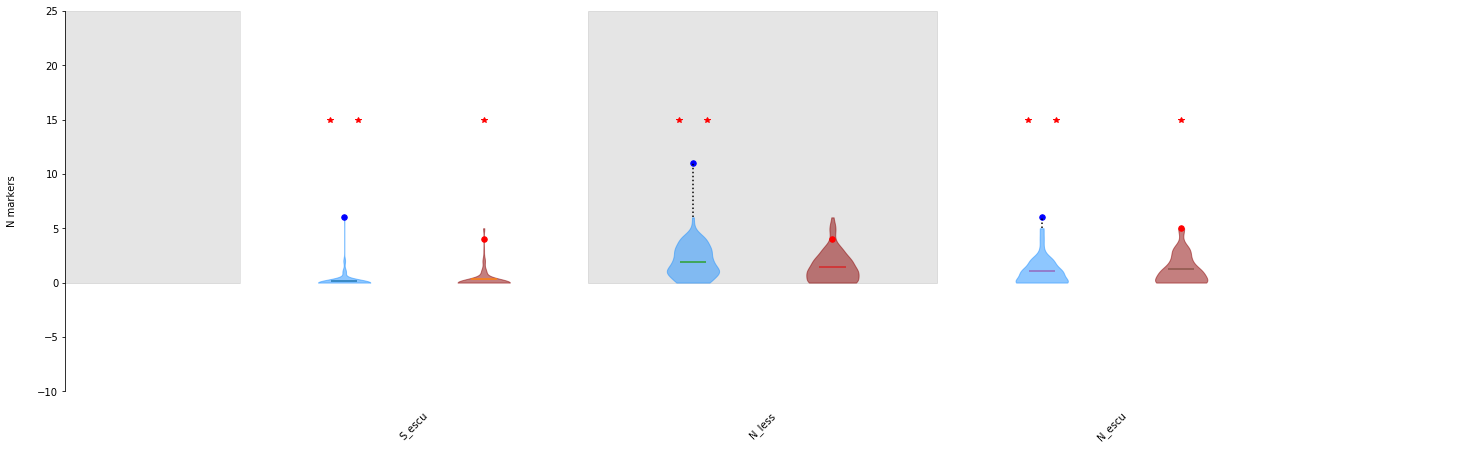

In [70]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 25


#real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in whisky_data:
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-1, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_het"]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_het"], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
            
        if sum(whisky_data[i]["ZW_het"]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_het"], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_het"]), (whisky_data[i]["ZW_het"]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_het"], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_het"], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["XY_het"][0] > max(whisky_data[i]["XY_het"]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_het"]), real_data_dict[i]["XY_het"],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_het"][0] > max(whisky_data[i]["ZW_het"]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_het"]), real_data_dict[i]["ZW_het"],  zorder = 2, linestyles='dotted')
            
            
                
        if real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 99):
            ax.plot(pos-0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos-0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["XY_het"][0] > np.percentile(whisky_data[i]["XY_het"], 95):
            ax.plot(pos-0.2, max_y-10, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 99):
            ax.plot(pos+0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos+0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_het"][0] > np.percentile(whisky_data[i]["ZW_het"], 95):
            ax.plot(pos+0.2, max_y-10, "*r", zorder = 3)
    
        
        

        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, max_y)
ax.set_xticks(range(1,len(whisky_data)+2))
ax.set_xticklabels(whisky_data, rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

#plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/SLM_Randomisations_het.svg")
    
plt.show()

In [72]:
whisky_data["S_escu"].keys()

['ZW_freq', 'XY_het', 'ZW_spec', 'Y_spec', 'ZW_het', 'XY_freq']

S_escu
N_less
N_escu


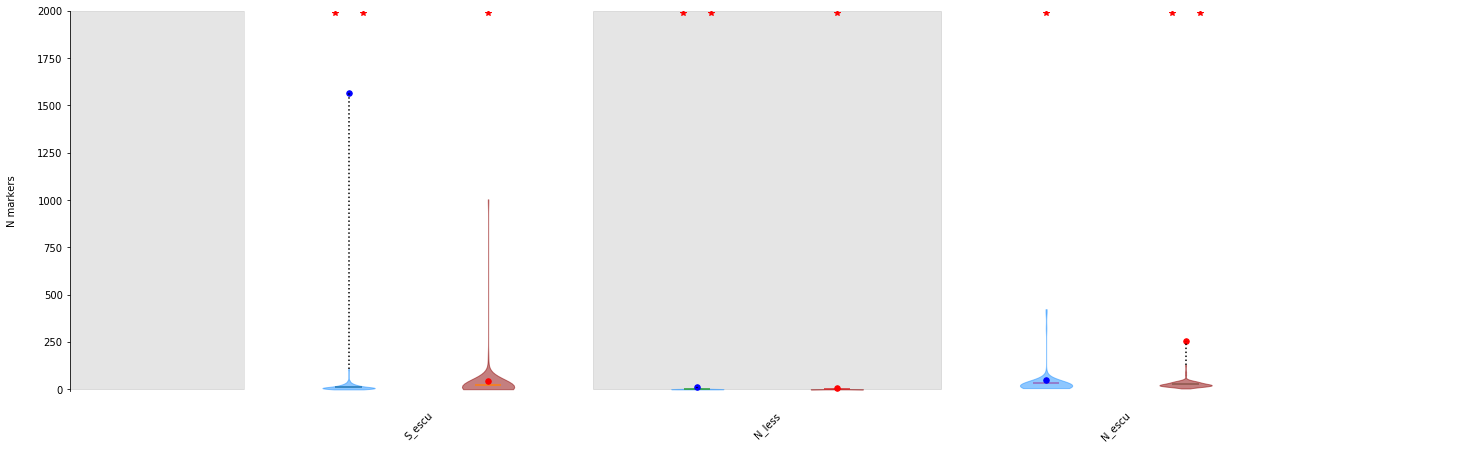

In [79]:
# And now then I just need to plot this as box plots

fig = plt.figure(figsize=(25,7), frameon = False, edgecolor = 'none')
ax = plt.subplot(111)
pos = 1
col = "white"

max_y = 2000
method = "freq"


#real_data = open("/home/djeffrie/Data/RADseq/Rarvalis_NEW/Stacks/Subsample_Randomisations/Real_data.txt", 'r').readlines()


for i in whisky_data:
    
        print i
    
        if col == "grey":
            col = "white"
        elif col == "white":
            col = "grey"
        
        ax.bar(left = pos-1, width = 1, height= max_y, color= col, edgecolor = col, bottom = 0, alpha = 0.2, zorder = 1)
        
        if sum(whisky_data[i]["XY_%s" % method]) > 0:
            vio1 = ax.violinplot(whisky_data[i]["XY_%s" % method], positions=[pos-0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos-0.2]*len(whisky_data[i]["ZW_%s" % method]), (whisky_data[i]["ZW_%s" % method]), marker = "_")
            
        if sum(whisky_data[i]["ZW_%s" % method]) > 0:
            vio2 = ax.violinplot(whisky_data[i]["ZW_%s" % method], positions=[pos+0.2], showmeans = True, showextrema = False , widths= 0.15)
        else:
            ax.scatter([pos+0.2]*len(whisky_data[i]["ZW_%s" % method]), (whisky_data[i]["ZW_%s" % method]), marker = "_")
        
       
        
        for pc in vio1['bodies']:
            pc.set_facecolor('dodgerblue')
            pc.set_edgecolor('dodgerblue')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
        
        for pc in vio2['bodies']:
            pc.set_facecolor('darkred')
            pc.set_edgecolor('darkred')
            pc.set_zorder(2)    
            pc.set_alpha(0.5)
            
        
        
        ax.scatter([pos-0.2], real_data_dict[i]["XY_%s" % method], c = "blue", zorder = 2, s = 30)
        ax.scatter([pos+0.2], real_data_dict[i]["ZW_%s" % method], c = "red", zorder = 2, s = 30)

        if real_data_dict[i]["XY_%s" % method][0] > max(whisky_data[i]["XY_%s" % method]):
            ax.vlines([pos-0.2], max(whisky_data[i]["XY_%s" % method]), real_data_dict[i]["XY_%s" % method],  zorder = 2, linestyles='dotted')
        if real_data_dict[i]["ZW_%s" % method][0] > max(whisky_data[i]["ZW_%s" % method]):
            ax.vlines([pos+0.2], max(whisky_data[i]["ZW_%s" % method]), real_data_dict[i]["ZW_%s" % method],  zorder = 2, linestyles='dotted')
            
            
                
        if real_data_dict[i]["XY_%s" % method][0] > np.percentile(whisky_data[i]["XY_%s" % method], 99):
            ax.plot(pos-0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos-0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["XY_%s" % method][0] > np.percentile(whisky_data[i]["XY_%s" % method], 95):
            ax.plot(pos-0.2, max_y-10, "*r", zorder = 3)
            
            
        if real_data_dict[i]["ZW_%s" % method][0] > np.percentile(whisky_data[i]["ZW_%s" % method], 99):
            ax.plot(pos+0.24, max_y-10, "*r", zorder = 3)
            ax.plot(pos+0.16, max_y-10, "*r", zorder = 3)
        elif real_data_dict[i]["ZW_%s" % method][0] > np.percentile(whisky_data[i]["ZW_%s" % method], 95):
            ax.plot(pos+0.2, max_y-10, "*r", zorder = 3)
    
        
        

        
        pos += 1

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Only show ticks on the left spines
ax.yaxis.set_ticks_position('left')
#ax.set_yscale("log")


#ax.set_yscale("log", nonposy='clip')

ax.set_xlim(0, len(whisky_data.keys()))
ax.set_ylim(-10, max_y)
ax.set_xticks(range(1,len(whisky_data)+2))
ax.set_xticklabels(whisky_data, rotation = 45)
ax.set_ylabel("N markers",labelpad=20)
ax.get_xaxis().set_tick_params(which='both', direction='out', pad = 15, bottom = 'off', top = 'off')
#plt.title(Species)

#plt.savefig("/home/djeffrie/Data/RADseq/Rarvalis_NEW/SLM_Randomisations_het.svg")
    
plt.show()